# Popularity analysis

## This notebook will:

1. Compute the popularity score based on **rating frequency** and **mean rating** of each book
2. From the popularity score derived from these values, books will be sorted in **descending order of popularity**, as well as **removing duplicates** of the same book
3. Drop the unneccessary columns
4. **Visualise** the processed data in order to analyse current popularity 


### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

### Load data

In [2]:
ratings = pd.read_csv('BX-Ratings-Clean.csv')
ratings

,User-ID,ISBN,Book-Rating,User-Country,User-Age
0,276744,038550120X,7,united states,38
1,276754,0684867621,8,canada,19
2,276755,0451166892,5,germany,32
3,276762,0380711524,5,germany,25
4,276772,0553572369,7,germany,36
...,...,...,...,...,...
204159,276688,0892966548,10,united states,47
204160,276688,1551669315,6,united states,47
204161,276704,0345386108,6,united states,35
204162,276704,0743211383,7,united states,35


### Find mean rating and rating frequency of books

In [3]:
mean_rating = ratings.groupby('ISBN')['Book-Rating'].mean().round(2)
rating_freq = ratings.groupby('ISBN')['Book-Rating'].count()

# Join the new columns to the dataframe
ratings = ratings.join(mean_rating, on = 'ISBN', rsuffix = '_mean')
ratings = ratings.join(rating_freq, on = 'ISBN', rsuffix = '_frequency')
ratings

,User-ID,ISBN,Book-Rating,User-Country,User-Age,Book-Rating_mean,Book-Rating_frequency
0,276744,038550120X,7,united states,38,7.57,79
1,276754,0684867621,8,canada,19,7.10,58
2,276755,0451166892,5,germany,32,8.38,86
3,276762,0380711524,5,germany,25,7.62,16
4,276772,0553572369,7,germany,36,6.62,8
...,...,...,...,...,...,...,...
204159,276688,0892966548,10,united states,47,8.00,4
204160,276688,1551669315,6,united states,47,7.20,5
204161,276704,0345386108,6,united states,35,6.85,33
204162,276704,0743211383,7,united states,35,6.89,55


### Drop unnecessary columns and remove duplicates, keeping first instance

In [4]:
# Drop unneccessary columns
ratings = ratings.drop(['User-ID', 'Book-Rating', 'User-Age', 'User-Country'], axis=1)
# Drop duplicates of books
ratings = ratings.drop_duplicates(subset='ISBN', keep='first')
ratings

,ISBN,Book-Rating_mean,Book-Rating_frequency
0,038550120X,7.57,79
1,0684867621,7.10,58
2,0451166892,8.38,86
3,0380711524,7.62,16
4,0553572369,6.62,8
...,...,...,...
167125,0804115419,7.75,4
169980,0312950446,8.50,4
171317,3250600571,9.00,4
173237,0886775809,8.00,4


### Compute popularity score

In [5]:
ratings['popularity_score'] = ratings.apply(lambda row: row['Book-Rating_mean'] * math.log(row['Book-Rating_frequency'] + 11) / math.log(20), axis=1).round(4)
ratings = ratings.sort_values(by='popularity_score', ascending=False)
ratings

,ISBN,Book-Rating_mean,Book-Rating_frequency,popularity_score
376,0316666343,8.21,675,17.8983
67,0385504209,8.43,479,17.4311
788,059035342X,8.94,308,17.2047
575,0142001740,8.48,302,16.2657
272,0312195516,8.20,362,16.2087
...,...,...,...,...
9014,0312107935,3.75,4,3.3899
35868,0312313616,3.60,5,3.3318
11524,0802117163,3.50,4,3.1639
22931,1880985055,3.00,7,2.8945


### Comprehensive view of current dataframe

In [6]:
ratings.describe()

,Book-Rating_mean,Book-Rating_frequency,popularity_score
count,18185.000000,18185.000000,18185.000000
mean,7.661527,11.227055,7.645022
std,0.885970,18.612601,1.363036
min,3.000000,1.000000,2.711900
25%,7.140000,4.000000,6.779800
50%,7.710000,6.000000,7.520500
75%,8.250000,11.000000,8.329600
max,10.000000,675.000000,17.898300


### Box plot of popularity scores


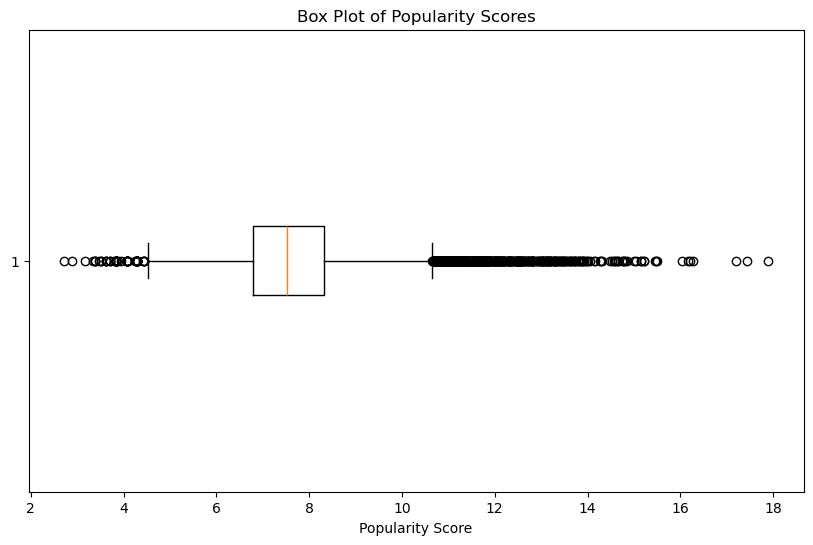

In [7]:
plt.figure(figsize=(10,6))
plt.boxplot(ratings['popularity_score'], vert=False)
plt.xlabel('Popularity Score')
plt.title('Box Plot of Popularity Scores')
plt.show()

### Histogram for distribution of popularity score across all books


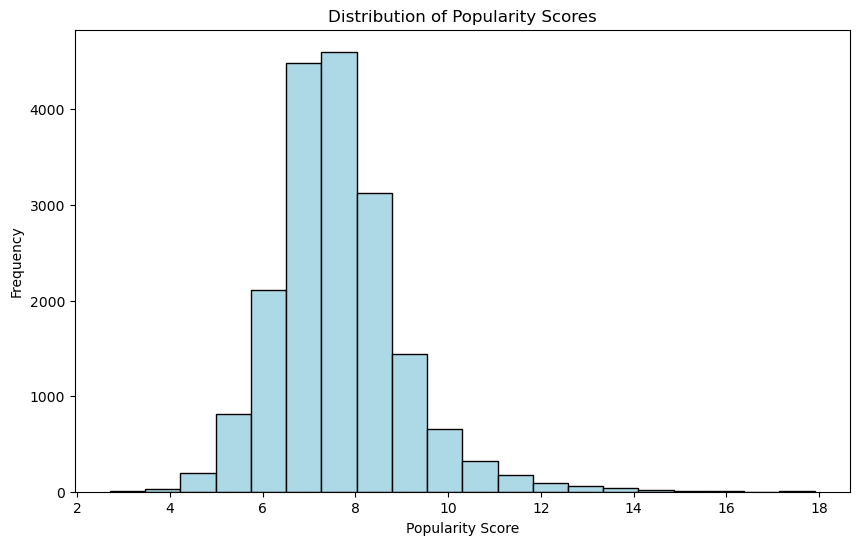

In [8]:
plt.figure(figsize=(10,6))
plt.hist(ratings['popularity_score'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.show()

### Box plot of rating frequency

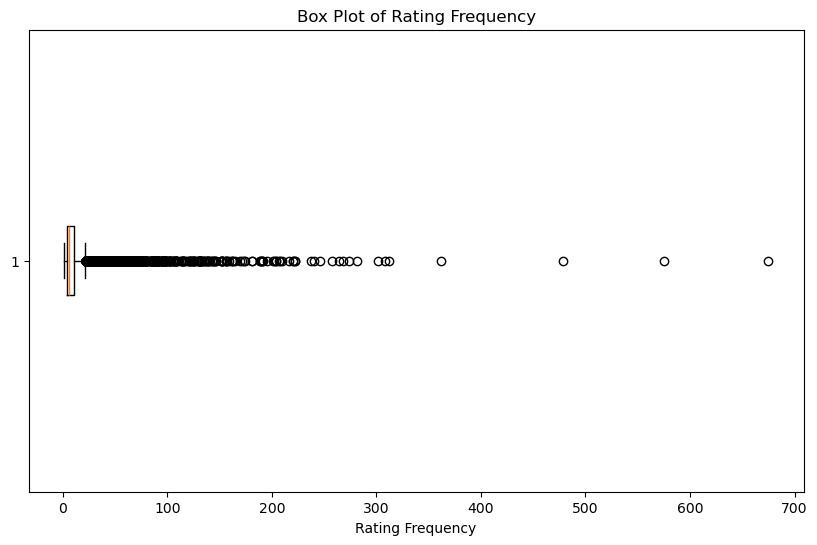

In [9]:
plt.figure(figsize=(10,6))
plt.boxplot(ratings['Book-Rating_frequency'], vert=False)
plt.xlabel('Rating Frequency')
plt.title('Box Plot of Rating Frequency')
plt.show()

### Finding outliers for popularity score and rating frequency

In [10]:
Q1 = ratings['popularity_score'].quantile(0.25)
Q3 = ratings['popularity_score'].quantile(0.75)
IQR = Q3 - Q1

popularity_outliers = ratings[(ratings['popularity_score'] < (Q1 - 1.5 * IQR)) | (ratings['popularity_score'] > (Q3 + 1.5 * IQR))]
popularity_outliers

,ISBN,Book-Rating_mean,Book-Rating_frequency,popularity_score
376,0316666343,8.21,675,17.8983
67,0385504209,8.43,479,17.4311
788,059035342X,8.94,308,17.2047
575,0142001740,8.48,302,16.2657
272,0312195516,8.20,362,16.2087
...,...,...,...,...
9014,0312107935,3.75,4,3.3899
35868,0312313616,3.60,5,3.3318
11524,0802117163,3.50,4,3.1639
22931,1880985055,3.00,7,2.8945


In [11]:
Q1 = ratings['Book-Rating_frequency'].quantile(0.25)
Q3 = ratings['Book-Rating_frequency'].quantile(0.75)
IQR = Q3 - Q1

frequency_outliers = ratings[(ratings['Book-Rating_frequency'] < (Q1 - 1.5 * IQR)) | (ratings['Book-Rating_frequency'] > (Q3 + 1.5 * IQR))]
frequency_outliers

,ISBN,Book-Rating_mean,Book-Rating_frequency,popularity_score
376,0316666343,8.21,675,17.8983
67,0385504209,8.43,479,17.4311
788,059035342X,8.94,308,17.2047
575,0142001740,8.48,302,16.2657
272,0312195516,8.20,362,16.2087
...,...,...,...,...
8096,0671534734,6.26,23,7.3688
3062,0679448594,6.18,22,7.2131
849,0446527017,6.09,23,7.1687
1386,039914739X,5.86,28,7.1664
